<a href="https://colab.research.google.com/github/Niharika-20-MAI-01/Winter-2021-Deep-Learning-LabCSE6037-Niharika-20MAI01/blob/main/20MAI0001__DL_Lab(CSE6037)_Implementation_of_different_types_of_AUTOENCODERS_with_the_MNIST_dataset_Activity_1_Asgn_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#DL-Lab-CSE6037_Lab-Assignment-6_Activity-1_Implementation_of_4_different-types_of_AUTOENCODERS---( a)Vanilla Autoencoder , b)Convolutional Autoencoder , c)Regularized Autoencoder , d)Multilayer Autoencoder )_with_the_MNIST-dataset.

#Submitted By: 20MAI0001 - NIHARIKA MAITRA

git Repo Link : 

In [50]:
#Importing necesssary libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, add
from keras.layers.core import Lambda, Dense, Dropout, Activation, Flatten, Reshape
from keras import regularizers
from keras.regularizers import l2
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D, ZeroPadding2D
from keras.utils import np_utils

# A) Vannilla Autoeccoder:  

#To Load the MNIST dataset and Reshape it :

In [51]:
(X_train, _), (X_test, _) = mnist.load_data()

To Reshape the Train and Test sets of the input dataset :

In [52]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data : 
To convert the pixels values between 0 and 1 instead of between 0 and 255

In [53]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.



To print the shape of the Train and Test sets of the input MNIST dataset :

In [54]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


#To perform Flattening of the images for the Fully-Connected Networks :

In [55]:
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

# Implementation of the A) Vanilla Autoencoder :

To Create the network for building the Vanilla Autoencoder : which is a simple autoencoder that has three layers : 1)Input , 2)Encoder,3) Decoder

In [56]:
input_size = 784
hidden_size = 64
output_size = 784

Adding the different layers to the Vanilla Autoencoder model being developed : 

In [57]:
#Input layer
x = Input(shape=(input_size,))

#Encoder Layer
h = Dense(hidden_size, activation='relu')(x)

#Decoder Layer
r = Dense(output_size, activation='sigmoid')(h)

#Constructing the Vanilla Autoencoder model being developed :
vnl_autoencoder = Model(inputs=x, outputs=r)


Model Summary of the Vanilla Autoencoder Model developed :

In [58]:
#Model Summary
vnl_autoencoder.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               50960     
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


To Compile the Vanilla Autoencoder Model developed :

In [59]:
vnl_autoencoder.compile(optimizer='adam', loss='mse')

In [60]:
#save the trained model to a file so that it can be used to make predictions later :
vnl_autoencoder.save("vnl.h5")

In [61]:
'''from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(vnl_autoencoder).create(prog='dot', format='svg'))'''

"from IPython.display import SVG\nfrom keras.utils.vis_utils import model_to_dot\n\nSVG(model_to_dot(vnl_autoencoder).create(prog='dot', format='svg'))"

#To train the Vanilla Autoencoder Model developed :

In [62]:
epochs = 5
batch_size = 128

history = vnl_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/5
469/469 [==============================] - 2s 3ms/step - loss: 0.0735 - val_loss: 0.0214
Epoch 2/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0189 - val_loss: 0.0125
Epoch 3/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0115 - val_loss: 0.0085
Epoch 4/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0082 - val_loss: 0.0066
Epoch 5/5
469/469 [==============================] - 1s 3ms/step - loss: 0.0064 - val_loss: 0.0055


To plot a few predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

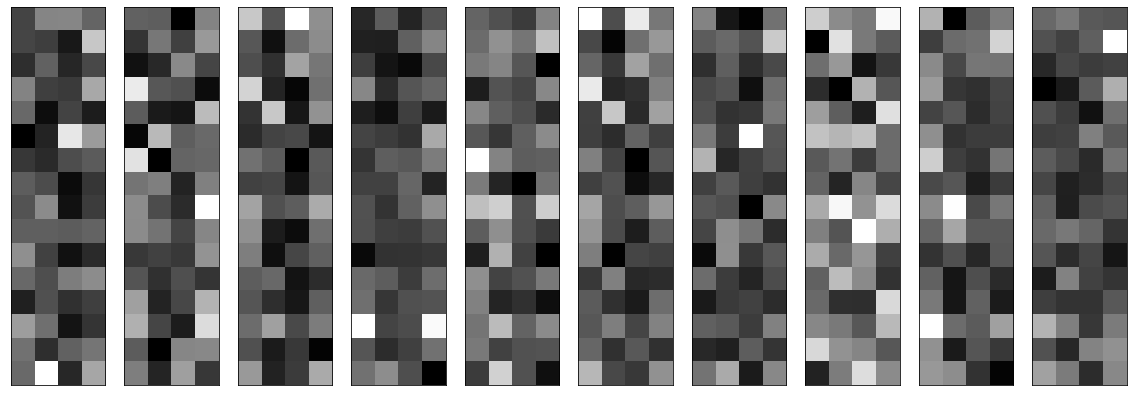

In [63]:
vnl_encoder = Model(x, h)
encoded_imgs1 = vnl_encoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs1[i].reshape(4, 16).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Predictions made by the developed Vanilla Autoencoder Model on the Test set of the MNIST dataset :

In [64]:
decoded_imgs1 = vnl_autoencoder.predict(X_test)

To Plot the Original/Actual  Test set imagaes of the MNIST dataset :

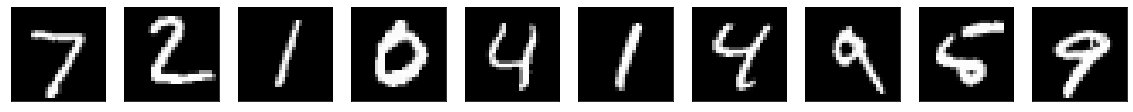

In [65]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

To Plot the predicted Output images of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

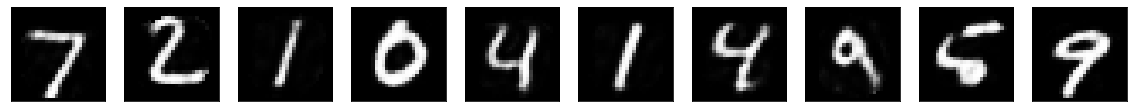

In [66]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
# display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs1[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()

#To Plot the losses of the developed Vanilla Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


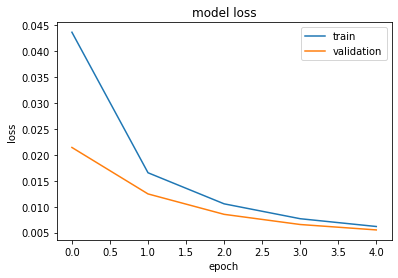

In [67]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

#B) Convolutional Autoencoder : 
This network model does not take flattened vectors as an input but images

#To Load the MNIST dataset and Reshape it :

In [68]:
nb_classes = 10

(X_train, y_train), (X_test, y_test) = mnist.load_data()


To Reshape the Train and Test sets of the input dataset :

In [69]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

#To Normalize the data :

To convert the pixels values between 0 and 1 instead of between 0 and 255

In [70]:
X_train = X_train.astype("float32")/255.
X_test = X_test.astype("float32")/255.

To print the shape of the Train and Test sets of the input MNIST dataset :

In [71]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


To convert integer values of the Predictor (Y) variable for both train and test sets into binary values :

In [72]:
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

#Implementation of the B) Convolutional Autoencoder :

To Create the network for building the Convolutional Autoencoder : which has three main layers : 1)Input , 2)Encoder,3) Decoder

In [73]:
#Input Section of the Convolutional Autoencoder :
x = Input(shape=(28, 28,1)) 

# Adding the different layers to the Convolutional Autoencoder being developed : 

Encoder Section of the Convolutional Autoencoder :

In [74]:
#1st Convolutional Layer
conv1_1 = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
pool1 = MaxPooling2D((2, 2), padding='same')(conv1_1)

#2nd Convolutional Layer
conv1_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D((2, 2), padding='same')(conv1_2)

#3rd Convolutional Layer
conv1_3 = Conv2D(8, (3, 3), activation='relu', padding='same')(pool2)

#Output Layer
h = MaxPooling2D((2, 2), padding='same')(conv1_3)

Decoder Section of the Convolutional Autoencoder :

In [75]:
#1st Convolutional Layer
conv2_1 = Conv2D(8, (3, 3), activation='relu', padding='same')(h)
up1 = UpSampling2D((2, 2))(conv2_1)

#2nd Convolutional Layer
conv2_2 = Conv2D(8, (3, 3), activation='relu', padding='same')(up1)
up2 = UpSampling2D((2, 2))(conv2_2)

#3rd Convolutional Layer
conv2_3 = Conv2D(16, (3, 3), activation='relu')(up2)
up3 = UpSampling2D((2, 2))(conv2_3)

#Output Layer
r = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(up3)


In [76]:
#Constructing the Convolutional Autoencoder model being developed :
cnv_autoencoder = Model(inputs=x, outputs=r)

Model Summary of the Convolutional Autoencoder Model developed :

In [77]:
##Model Summary
cnv_autoencoder.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 4, 4, 8)           0   

To Compile the Convolutional Autoencoder Model developed :

In [78]:
cnv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [79]:
#save the trained model to a file so that it can be used to make predictions later :
cnv_autoencoder.save("cnv.h5")

#To train the Convolutional Autoencoder Model developed :

In [80]:
epochs = 3
batch_size = 128

history = cnv_autoencoder.fit(X_train, X_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_test, X_test))

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 0.3770 - val_loss: 0.1501
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.1432 - val_loss: 0.1278
Epoch 3/3
469/469 [==============================] - 3s 6ms/step - loss: 0.1267 - val_loss: 0.1196


To plot a few predictions made by the developed Convolutional Autoencoder Model on the Test set of the MNIST dataset :

In [81]:
#conv_encoder = Model(x, h)
#encoded_imgs2 = conv_encoder.predict(X_test)
decoded_imgs2 = cnv_autoencoder.predict(X_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(encoded_imgs2[i].reshape(4, 16, -1).T)
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Predictions made by the developed Convolutional Autoencoder Model on the Test set of the MNIST dataset :

In [82]:
decoded_imgs2 = cnv_autoencoder.predict(X_test)

To Plot the Original/Actual Test set imagaes of the MNIST dataset :

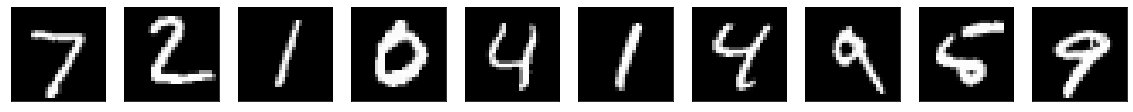

In [83]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display original
    ax = plt.subplot(3, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

To Plot the predicted Output images of the developed Convolutional Autoencoder Model implemented on the Test set of the MNIST dataset :

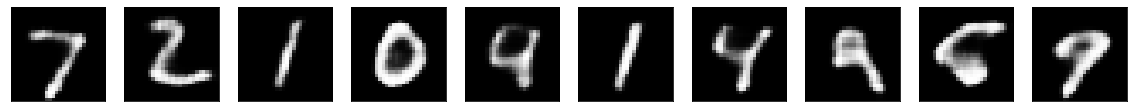

In [84]:
n = 10
plt.figure(figsize=(20, 6))

for i in range(n):
    # display reconstruction
    ax = plt.subplot(3, n, i+n+1)
    plt.imshow(decoded_imgs2[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

To Plot the losses of the developed Convolutional Autoencoder Model implemented on the Test set of the MNIST dataset :

dict_keys(['loss', 'val_loss'])


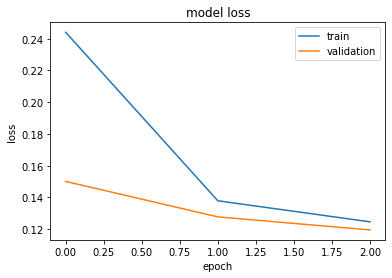

In [85]:
print(history.history.keys())

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()